<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#quick-start" data-toc-modified-id="quick-start-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>quick start</a></span><ul class="toc-item"><li><span><a href="#Resources" data-toc-modified-id="Resources-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resources</a></span></li></ul></li><li><span><a href="#FULL-MODEL" data-toc-modified-id="FULL-MODEL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>FULL MODEL</a></span><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Packages</a></span><ul class="toc-item"><li><span><a href="#Qnetwork" data-toc-modified-id="Qnetwork-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Qnetwork</a></span></li></ul></li><li><span><a href="#POMDP-RNN-Game" data-toc-modified-id="POMDP-RNN-Game-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>POMDP RNN Game</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Standard-setting：-grid-=--(3,7)，-holes-=-0" data-toc-modified-id="Standard-setting：-grid-=--(3,7)，-holes-=-0-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Standard setting： grid =  (3,7)， holes = 0</a></span></li><li><span><a href="#Model-Tranining" data-toc-modified-id="Model-Tranining-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Model Tranining</a></span></li><li><span><a href="#decoding-vs-performance" data-toc-modified-id="decoding-vs-performance-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>decoding vs performance</a></span></li><li><span><a href="#learning-rate-vs-performance" data-toc-modified-id="learning-rate-vs-performance-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>learning rate vs performance</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Anlytic-part-,-check-the-behaviour-correspond-to-each-decoding-level-and-explain-why" data-toc-modified-id="Anlytic-part-,-check-the-behaviour-correspond-to-each-decoding-level-and-explain-why-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>Anlytic part , check the behaviour correspond to each decoding level and explain why</a></span></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>PCA</a></span></li></ul></li></ul></div>

# quick start 

Test what is the decoding change for single size training 

## Resources

* [*The* Reinforcement learning book from Sutton & Barto](http://incompleteideas.net/sutton/book/the-book-2nd.html)
* [The REINFORCE paper from Ronald J. Williams (1992)](http://www-anw.cs.umass.edu/~barto/courses/cs687/williams92simple.pdf)


# FULL MODEL

## Packages

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from itertools import count
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
from torch.autograd import Variable
from torch.nn import init
from torch.nn import DataParallel
from torch.utils.data import DataLoader

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
from IPython.display import HTML

import pretrain
from pretrain import *

import Nets
from Nets import*

import navigation2
from navigation2 import *

%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/home/tie/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Qnetwork

To select actions we take maximum of Q value, corresponding to certain move.

For the liquid state approach to work, you need a lot of neurons as surplus or enough hidden to hidden connectivity to make it have an effect.

##  POMDP RNN Game

In this game , we use a new reward function determined by game, if the agent achieves the goal before 50, reward is 1. If time pass 50 reward is 0.5, once time pass 100 agent gets a reward of -0.5 .  Practically, this is found to be easier to learn than the rewards as a continous function of time.  Tf the agent learns to search in a efficient way, the largest possible way for search is to firstly arrive at corner then goes to the goal, which, takes about 50 steps, it is reasonble to make 50 and 100 as milestone thing.  Also in principe as the game doesn't have a timer , it is not if it can use a reward as funtion of time

3 condition for ending , when pass time limit, game over

For weight update, it seems to be better do it after episode, as it makes non-sense evaluate strategy during episode, but a the end. Also, it is much quicker. 

A programming of MDP here, hidden state is as state of enviroment

In [2]:
pregame = PretrainGame(grid_size = (15, 15), holes = 0, random_seed = 4 , set_reward = [(0.5, 0.25), (0.5, 0.75)])
pregame.reset(set_agent=(2,2))
# rls_q = RLS(1)
# rls_sl = RLS(1)
# for i in range(1):
#     pregame.fulltrain(trials = 4)
    

In [3]:
game = ValueMaxGame(pregame.net, grid_size = (15, 15), holes = 0, random_seed = 4 , set_reward =  [(0.5, 0.25), (0.5, 0.75)])
game.reset(set_agent = (2, 2), size = 15, reward_control = 1)
# game.experiment(rls_q, rls_sl, 20, epsilon = 0.5, lr = 1e-3, train_hidden = False, train_q = False) 

(9, 5)
[-1. -1. -1.  0.  0. -1.  0.  0. -1.]


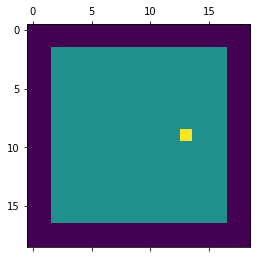

In [4]:
plt.matshow(game.grid.grid)
# plt.savefig('g16h3-map')
print (game.pos_reward_)
print (game.visible_state)

## Model Tranining 
Pretranining is done with fixed size 15,  training is between 10 to 15, test on 19 

Training from zero seems to be better because it will allow the agent to explore from new

In [5]:
for iters, noise in enumerate(3 * [0.0]):
    for trial in [48]: 
        Pretest =  PretrainTest(holes = 0, weight_write = '/home/tie/Research/PhD/NavigationPaper_606/pretrain/pretrain_pos_origin2/weights_cpu/rnn_1515tanh512_checkpoint{}'.format(trial))
        weight_read = Pretest.weight
        weight_write = 'weights2/rnn_1515tanh512_checkpoint{}_{}'.format(trial, iters)
        rewards = Pretest.qlearn(weight_read,  weight_write, iterations = 30, noise = noise, size_train =[15], size_test=[15])
        np.save('Rewards_{}_{}.npy'.format(iters, trial), rewards)

clear session data 4 13753589760
0 rewards -0.3606073288690476
clear session data 4 14006919168
1 rewards -0.2972237723214286
clear session data 4 14012702720
2 rewards -0.203125
clear session data 4 14012960768
3 rewards -0.23522135416666667
clear session data 4 14012948480
4 rewards -0.390625
clear session data 4 14012678144
5 rewards -0.53125
clear session data 4 14012407808
6 rewards -0.6563648897058824
clear session data 4 14012661760
7 rewards -0.6875
clear session data 4 14012915712
8 rewards -0.71875
clear session data 4 14012645376
9 rewards -0.7215294471153846
clear session data 4 14012637184
10 rewards -0.75
clear session data 4 14012628992
11 rewards -0.734375
clear session data 4 14012620800
12 rewards -0.734375
clear session data 4 14013145088
13 rewards -0.75
clear session data 4 14012612608
14 rewards -0.703125
clear session data 4 14012612608
15 rewards -0.703125
clear session data 4 14012596224
16 rewards -0.640625
clear session data 4 14013124608
17 rewards -0.515625

In [6]:
for iters, noise in enumerate(3 * [0.0]):
    for trial in [39]: 
        Pretest =  PretrainTest(holes = 0, weight_write = '/home/tie/Research/PhD/NavigationPaper_606/pretrain/pretrain_pos_origin2/weights_cpu/rnn_1515tanh512_checkpoint{}'.format(trial))
        weight_read = Pretest.weight
        weight_write = 'weights2/rnn_1515tanh512_checkpoint{}_{}'.format(trial, iters)
        rewards = Pretest.qlearn(weight_read,  weight_write, iterations = 30, noise = noise, size_train =[15], size_test=[15])
        np.save('Rewards_{}_{}.npy'.format(iters, trial), rewards)

clear session data 4 13317668864
0 rewards -0.359375
clear session data 4 13893173248
1 rewards -0.28125
clear session data 4 13895168000
2 rewards -0.2214509185658942
clear session data 4 14018658304
3 rewards -0.16032088122605365
clear session data 4 13895213056
4 rewards 0.040886251335470095
clear session data 4 13956153344
5 rewards -0.10118176660296226
clear session data 4 13894696960
6 rewards -0.09671921031343572
clear session data 4 13890850816
7 rewards -0.001806522014170045
clear session data 4 13952991232
8 rewards -0.04710036057692307
clear session data 4 13891149824
9 rewards 0.13781514709249085
clear session data 4 14012329984
10 rewards 0.08940149066091954
clear session data 4 13889363968
11 rewards 0.09358465608465608
clear session data 4 13951344640
12 rewards 0.08997395833333333
clear session data 4 14012469248
13 rewards 0.17136375881661445
clear session data 4 13889548288
14 rewards 0.139453125
clear session data 4 13950947328
15 rewards 0.02749041323260073
clear se

### measure decoding 

Decoding accuracy decreases, there are two possible reasons: 
1, decoding has bias,  information of position is only refleted by decoding, if there is certain bias , it is not trustable
2, it is the real measure of information, so there are less spatial information about space, or an effect decoupling/disentanglement of position. This can be due the network succeed at finding an even lower diemnsion object which gives successful performance.  The representation deceases its information to input in a sense. 

This can be linked to receptive field by looking at how space is represented. 